c:\Users\Standard\miniconda3\envs\mobsterh\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(5.4585)


(array([  2.,   0.,   1.,   1.,   1.,   4.,   7.,   9.,  14.,  12.,  16.,
         21.,  25.,  36.,  35.,  43.,  63.,  71.,  72.,  85.,  85.,  96.,
        110., 115., 113.,  97., 105., 100.,  97.,  88.,  83.,  83.,  64.,
         46.,  43.,  40.,  32.,  16.,  17.,  20.,   7.,   6.,   8.,   4.,
          2.,   1.,   2.,   1.,   0.,   1.]),
 array([10.66316795, 10.67349911, 10.68382931, 10.69416046, 10.70449066,
        10.71482182, 10.72515202, 10.73548317, 10.74581432, 10.75614452,
        10.76647568, 10.77680588, 10.78713703, 10.79746819, 10.80779839,
        10.81812954, 10.82845974, 10.83879089, 10.84912109, 10.85945225,
        10.8697834 , 10.8801136 , 10.89044476, 10.90077496, 10.91110611,
        10.92143631, 10.93176746, 10.94209862, 10.95242882, 10.96275997,
        10.97309017, 10.98342133, 10.99375248, 11.00408268, 11.01441383,
        11.02474403, 11.03507519, 11.04540539, 11.05573654, 11.0660677 ,
        11.0763979 , 11.08672905, 11.09705925, 11.1073904 , 11.11772156,
 

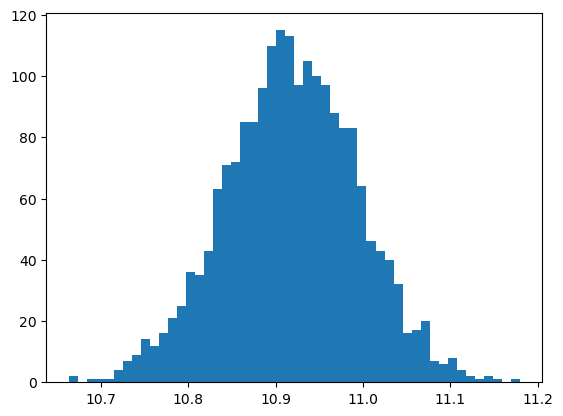

In [1]:
import numpy as np
import pandas as pd
import pyro.distributions as dist
import matplotlib.pyplot as plt
import torch

alpha_precision_concentration = 2
alpha_precision_rate=0.01

alpha_prior = dist.Gamma(2, 0.4).sample()
print(alpha_prior)
alpha_precision = dist.Gamma(concentration=alpha_precision_concentration, rate=alpha_precision_rate).sample()

alpha = dist.LogNormal(torch.log(alpha_prior * 2), 1 / alpha_precision).sample([2000])
# alpha = dist.LogNormal(torch.log(torch.tensor(2.)), 0.05).sample([2000])
plt.hist(alpha.numpy(), bins = 50)

(array([ 52.,  98., 142., 130., 153., 159., 165., 119., 129., 111.,  97.,
         82.,  76.,  81.,  54.,  54.,  38.,  50.,  33.,  38.,  19.,  24.,
         15.,  12.,   9.,  11.,   6.,  12.,   9.,   7.,   6.,   0.,   1.,
          0.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.05109321,  0.58421057,  1.11732793,  1.65044522,  2.18356252,
         2.71668005,  3.24979734,  3.78291464,  4.31603193,  4.84914923,
         5.38226652,  5.91538382,  6.44850159,  6.98161888,  7.51473618,
         8.04785347,  8.58097076,  9.11408806,  9.64720535, 10.18032265,
        10.71343994, 11.24655724, 11.77967453, 12.31279182, 12.84590912,
        13.37902737, 13.91214466, 14.44526196, 14.97837925, 15.51149654,
        16.04461288, 16.57773018, 17.11084747, 17.64396667, 18.17708397,
        18.71020126, 19.24331856, 19.77643585, 20.30955315, 20.84267044,
        21.37578773, 21.90890503, 22.44202232, 22.97513962, 23.50825691,
 

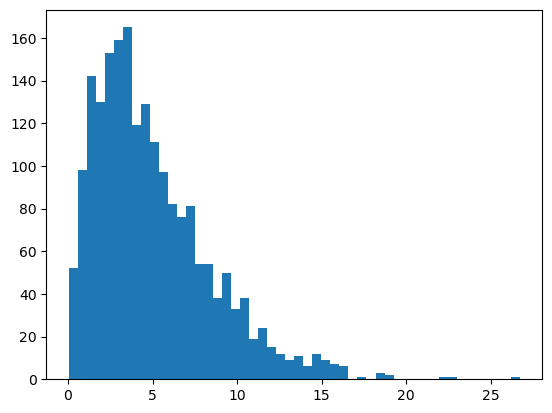

In [61]:
alpha_prior = dist.Gamma(2, 0.4).sample([2000])
plt.hist(alpha_prior.numpy(), bins = 50)

(array([  7.,   2.,   5.,   8.,   9.,  14.,  21.,  31.,  30.,  36.,  50.,
         65.,  71.,  74.,  97., 102.,  99., 104., 123., 102.,  99.,  95.,
         95.,  82.,  83.,  69.,  62.,  58.,  44.,  54.,  39.,  32.,  24.,
         27.,  16.,  14.,  10.,   8.,  13.,   4.,   6.,   7.,   4.,   2.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([0.74164939, 0.75452709, 0.76740479, 0.7802825 , 0.7931602 ,
        0.8060379 , 0.81891561, 0.83179331, 0.84467101, 0.85754871,
        0.87042642, 0.88330412, 0.89618182, 0.90905952, 0.92193723,
        0.93481493, 0.94769263, 0.96057034, 0.97344804, 0.98632574,
        0.99920344, 1.01208115, 1.02495885, 1.03783655, 1.05071425,
        1.06359196, 1.07646966, 1.08934736, 1.10222507, 1.11510277,
        1.12798047, 1.14085817, 1.15373588, 1.16661358, 1.17949128,
        1.19236898, 1.20524669, 1.21812439, 1.23100209, 1.2438798 ,
        1.2567575 , 1.2696352 , 1.2825129 , 1.29539061, 1.30826831,
        1.32114601, 1.33402371, 1.34690142, 1.

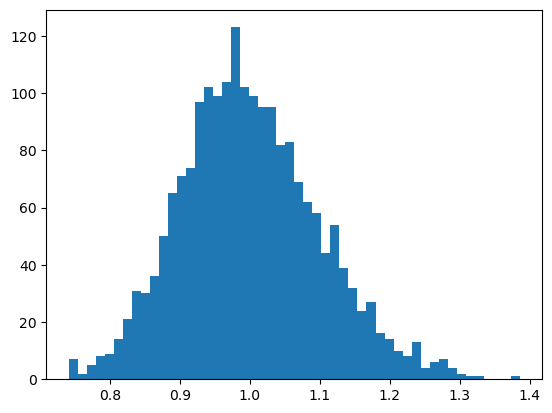

In [4]:
alpha = dist.LogNormal(torch.log(torch.tensor(2.)), 1/10).sample([2000])
plt.hist(alpha.numpy(), bins = 50)

(array([ 1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  1.,  0.,  1.,  2.,
         2.,  1.,  1.,  5., 10.,  4., 12., 13., 11., 12., 18., 29., 15.,
        27., 28., 39., 50., 46., 42., 47., 53., 56., 71., 61., 56., 55.,
        54., 54., 27., 26., 26., 13., 13.,  5.,  4.,  2.,  2.]),
 array([-1.65118361, -1.54038882, -1.42959392, -1.31879914, -1.20800436,
        -1.09720945, -0.98641467, -0.87561989, -0.76482505, -0.6540302 ,
        -0.54323542, -0.43244058, -0.32164577, -0.21085094, -0.10005611,
         0.01073871,  0.12153353,  0.23232836,  0.34312317,  0.45391798,
         0.56471282,  0.67550761,  0.78630245,  0.89709729,  1.00789213,
         1.11868691,  1.2294817 ,  1.3402766 ,  1.45107138,  1.56186616,
         1.67266107,  1.78345585,  1.89425063,  2.00504541,  2.1158402 ,
         2.22663522,  2.33743   ,  2.44822478,  2.55901957,  2.66981435,
         2.78060913,  2.89140415,  3.00219893,  3.11299372,  3.2237885 ,
         3.33458328,  3.44537807,  3.55617309,  3.66696787,

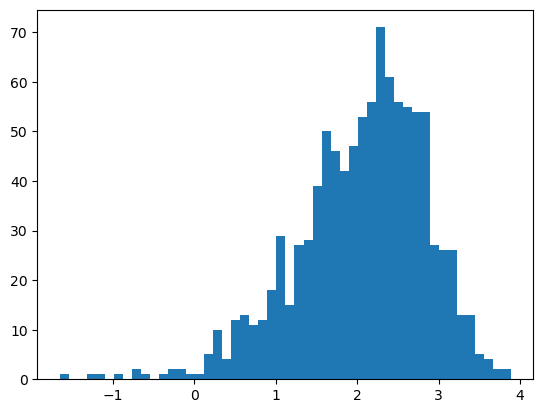

In [43]:
alpha_prior = dist.Gamma(2, 0.4).sample([1000])
# plt.hist(alpha_prior.numpy(), bins = 50)
# plt.hist(torch.log(2.*alpha_prior).numpy(), bins = 50)
alpha = dist.Normal(torch.log(2.*alpha_prior), 0.005).sample()
plt.hist(alpha.numpy(), bins = 50)

### Check betabinomial

(array([ 2.,  1.,  0.,  1.,  0.,  2.,  1.,  8., 11.,  9., 15., 15., 18.,
        27., 30., 27., 47., 33., 39., 41., 41., 53., 53., 58., 43., 45.,
        50., 45., 47., 36., 42., 25., 22., 21., 16., 21., 13.,  8.,  6.,
         6.,  5.,  2.,  1.,  6.,  2.,  3.,  1.,  1.,  0.,  1.]),
 array([18.22570992, 18.71922874, 19.21274948, 19.70626831, 20.19978714,
        20.69330597, 21.18682671, 21.68034554, 22.17386436, 22.6673851 ,
        23.16090393, 23.65442276, 24.1479435 , 24.64146233, 25.13498116,
        25.62850189, 26.12202072, 26.61553955, 27.10905838, 27.60257912,
        28.09609795, 28.58961678, 29.08313751, 29.57665634, 30.07017517,
        30.563694  , 31.05721474, 31.55073357, 32.0442543 , 32.53777313,
        33.03129196, 33.52481079, 34.01832962, 34.51184845, 35.00537109,
        35.49888992, 35.99240875, 36.48592758, 36.97944641, 37.47296524,
        37.96648407, 38.46000671, 38.95352554, 39.44704437, 39.9405632 ,
        40.43408203, 40.92760086, 41.4211235 , 41.91464233,

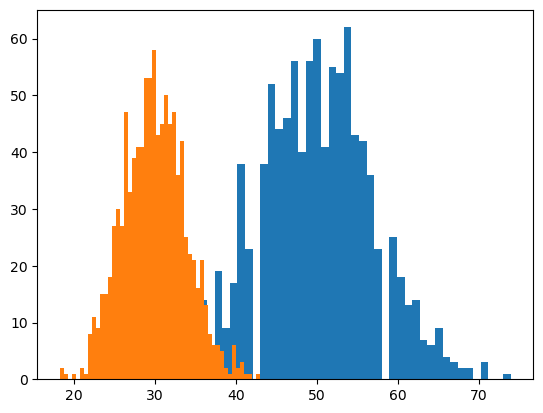

In [18]:
phi = 0.5
k = 100
a = phi * k
b = (1-phi) * k
p = 0.6
n = 100
betabin = dist.BetaBinomial(a, b, n).sample([1000])
beta = dist.Beta(a, b).sample([1000])*dist.Binomial(probs = p, total_count=n).sample([1000])

plt.hist(betabin.numpy(), bins = 50)
plt.hist(beta.numpy(), bins = 50)

### Check betas_subclone_n_samples (i.e. k_beta)

In [3]:
prior_lims_clonal=[0.1, 100000.]
prior_overdispersion = dist.Uniform(prior_lims_clonal[0], prior_lims_clonal[1]).sample()
print(prior_overdispersion)
prec_overdispersion = dist.Gamma(3.,1.).sample()
print(prec_overdispersion)
k_beta = dist.LogNormal(torch.log(prior_overdispersion), 1 / prec_overdispersion).sample()
print(k_beta)

tensor(58869.6797)
tensor(2.6359)
tensor(55994.1484)


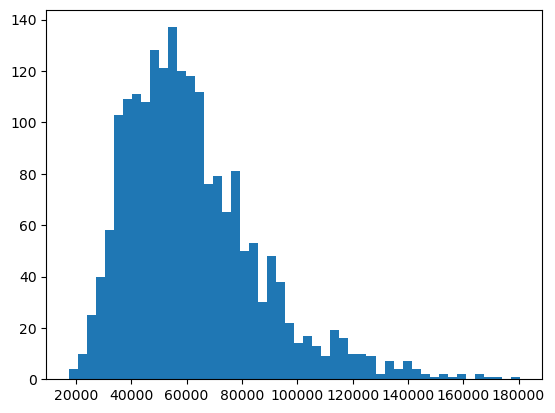

In [4]:
k_beta = dist.LogNormal(torch.log(prior_overdispersion), 1 / prec_overdispersion).sample([2000])
plt.hist(k_beta, bins = 50);

In [5]:
precision = torch.tensor(20.)  # Increase this value to reduce variance

# Calculate the standard deviation in the log space
std_dev = 1 / torch.sqrt(precision)
print(std_dev)

tensor(0.2236)


tensor(4.6052)
tensor(0.0012)


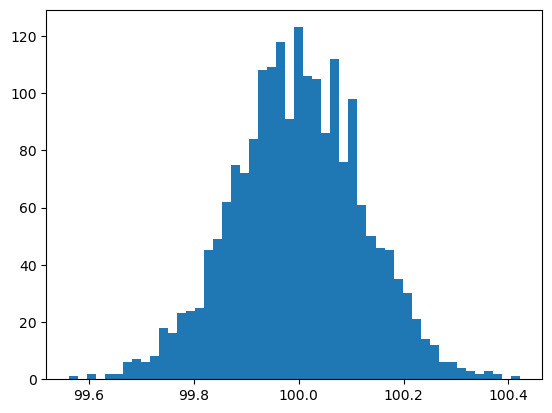

In [8]:
# My k_beta
prior_overdispersion = torch.tensor(100.)
print(torch.log(prior_overdispersion))
prec_overdispersion = torch.tensor(800.)
print(1/prec_overdispersion)
k_beta = dist.LogNormal(torch.log(prior_overdispersion), 1/prec_overdispersion).sample([2000])
plt.hist(k_beta, bins = 50);

### Clonal and subclonal means (i.e., phi_beta)

tensor([ 0.0123,  0.0088,  0.0005,  ..., -0.0042, -0.0023, -0.0037])


(array([45., 31., 40., 44., 48., 45., 41., 40., 36., 29., 37., 41., 39.,
        38., 42., 32., 40., 31., 42., 45., 42., 42., 41., 33., 57., 40.,
        34., 52., 47., 35., 53., 31., 36., 38., 50., 27., 29., 32., 44.,
        31., 55., 39., 37., 48., 52., 37., 33., 45., 41., 33.]),
 array([-0.00668947, -0.00628969, -0.00588991, -0.00549013, -0.00509034,
        -0.00469056, -0.00429078, -0.003891  , -0.00349121, -0.00309143,
        -0.00269165, -0.00229187, -0.00189209, -0.0014923 , -0.00109252,
        -0.00069274, -0.00029296,  0.00010683,  0.00050661,  0.00090639,
         0.00130617,  0.00170596,  0.00210574,  0.00250552,  0.0029053 ,
         0.00330509,  0.00370487,  0.00410465,  0.00450443,  0.00490421,
         0.005304  ,  0.00570378,  0.00610356,  0.00650334,  0.00690313,
         0.00730291,  0.00770269,  0.00810247,  0.00850226,  0.00890204,
         0.00930182,  0.0097016 ,  0.01010139,  0.01050117,  0.01090095,
         0.01130073,  0.01170051,  0.0121003 ,  0.01250008,

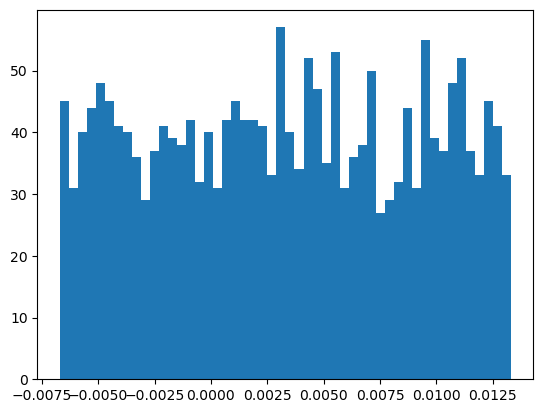

In [6]:
# SUBCLONES
epsilon_ccf = 0.01
ccf_adjust = 0.5
purity = 1
subclonal_ccf = dist.Uniform(0.000001, 0.99999).sample()
adj_ccf = subclonal_ccf * ccf_adjust * purity
k_means = dist.Uniform(adj_ccf - epsilon_ccf, adj_ccf + epsilon_ccf).sample([2000])
print(k_means)
plt.hist(k_means.numpy(), bins = 50)

(array([  2.,   0.,   0.,   1.,   4.,   2.,   0.,   2.,   5.,  10.,  19.,
         19.,  20.,  30.,  33.,  33.,  47.,  43.,  42.,  79.,  90.,  84.,
         93., 110., 114.,  84., 119., 125.,  92., 103.,  85.,  87.,  67.,
         95.,  59.,  51.,  38.,  26.,  25.,  18.,  13.,   8.,  10.,   4.,
          4.,   2.,   0.,   2.,   0.,   1.]),
 array([0.41940653, 0.42252675, 0.42564699, 0.4287672 , 0.43188745,
        0.43500766, 0.43812788, 0.44124812, 0.44436833, 0.44748858,
        0.45060879, 0.453729  , 0.45684925, 0.45996946, 0.4630897 ,
        0.46620992, 0.46933013, 0.47245038, 0.47557059, 0.47869083,
        0.48181105, 0.48493126, 0.4880515 , 0.49117172, 0.49429196,
        0.49741217, 0.50053239, 0.50365263, 0.50677288, 0.50989306,
        0.5130133 , 0.51613355, 0.51925373, 0.52237397, 0.52549422,
        0.5286144 , 0.53173465, 0.53485489, 0.53797513, 0.54109532,
        0.54421556, 0.5473358 , 0.55045599, 0.55357623, 0.55669647,
        0.55981672, 0.5629369 , 0.56605715, 0.

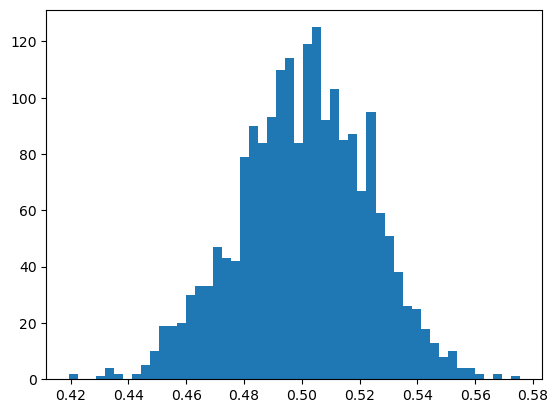

In [34]:
# CLONES
number_of_trials_clonal_mean = 500
theo_clonal_means = 0.5
bm_11 = number_of_trials_clonal_mean*theo_clonal_means
bm_21 = number_of_trials_clonal_mean-bm_11
phi_beta = dist.Beta(bm_11, bm_21).sample([2000])
plt.hist(phi_beta.numpy(), bins = 50)

### Counts_clones

In [36]:
theo_clonal_list = {
    "1:0" : 1,
    "1:1" : 1,
    "2:0" : 2,
    "2:1" : 2,
    "2:2" : 2
}

karyos = list(['1:1'])
theoretical_num_clones = [theo_clonal_list[kr] for kr in karyos]
print(theoretical_num_clones)
counts_clones = dict()
for i in theoretical_num_clones:
    counts_clones[i] = counts_clones.get(i, 0) + 1
counts_clones # conta quanti cariotipi hanno 1 o 2 alleli. Nel mio caso ho 1 cariotipo con 1 allele.

[1]


{1: 1}

In [37]:
index_1 = [i for i, j in enumerate(theoretical_num_clones) if j == 1] # ritorna l'indice degli elementi il cui valore è 1
index_2 = [i for i, j in enumerate(theoretical_num_clones) if j == 2]# ritorna l'indice degli elementi il cui valore è 1

print(index_1)
print(index_2)

[0]
[]


In [39]:
for i, j in enumerate(theoretical_num_clones):
    print(i,j) # index 0, value 1

0 1


In [47]:
theo_clonal_means_list = {
    "1:0" : torch.tensor(0.9999),
    "1:1" : torch.tensor(0.5),
    "2:0" : torch.tensor([0.5,0.9999]),
    "2:1" : torch.tensor([1/3.,2/3.]),
    "2:2" : torch.tensor([0.25,0.5])
}
theoretical_clonal_means = [theo_clonal_means_list[kr] * 1 for kr in karyos]
print(theoretical_clonal_means)
a_1_theo = torch.tensor([theoretical_clonal_means[i] for i in index_1]).reshape([1, counts_clones[1]])
print(a_1_theo)

[tensor(0.5000)]
tensor([[0.5000]])


In [51]:
a11 = a_1_theo.reshape([1 , len(index_1)])
idx1 = 0
dist.Delta(a11[:, idx1])

Delta(v: tensor([0.5000]), log_density: tensor([0.]))